In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from importlib import reload
import warnings
import acquire as a
import prepare as p
import explore as e


In [12]:
warnings.simplefilter("ignore")
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
reload(p)
readmes = a.acquire_readmes()
readmes.readme_contents = readmes.readme_contents.astype('str')
readmes = p.prep_df_for_nlp(readmes,'readme_contents',extra_words=["'","use"],exclude_words=[])
train, validate, test = p.split_data(readmes,'language')

In [7]:
readmes.head()

,repo,language,readme_contents,clean,stem,lemmatized,username,lemmatized_len
0,terminal,Other,![terminal-logos](https://user-images.githubus...,terminallogos welcome windows terminal console...,terminallogo welcom window termin consol comma...,terminallogos welcome window terminal console ...,microsoft,8287
1,PowerToys,Other,# Microsoft PowerToys\n\n![Hero image for Micr...,microsoft powertoys hero microsoft powertoys u...,microsoft powertoy hero microsoft powertoy use...,microsoft powertoys hero microsoft powertoys u...,microsoft,6326
2,transformers,Python,<!---\nCopyright 2020 The HuggingFace Team. Al...,copyright 2020 huggingface teamall rights rese...,copyright 2020 huggingfac teamal right reserve...,copyright 2020 huggingface teamall right reser...,huggingface,24287
3,rust,Other,# The Rust Programming Language\n\nThis is the...,rust programming language main source code rep...,rust program languag main sourc code repositor...,rust programming language main source code rep...,rust-lang,5716
4,every-programmer-should-know,Not Listed,> *[Join our community](https://metadevelopmen...,join community professional software developer...,join commun profession softwar develop get con...,join community professional software developer...,mtdvio,6417


<AxesSubplot:>

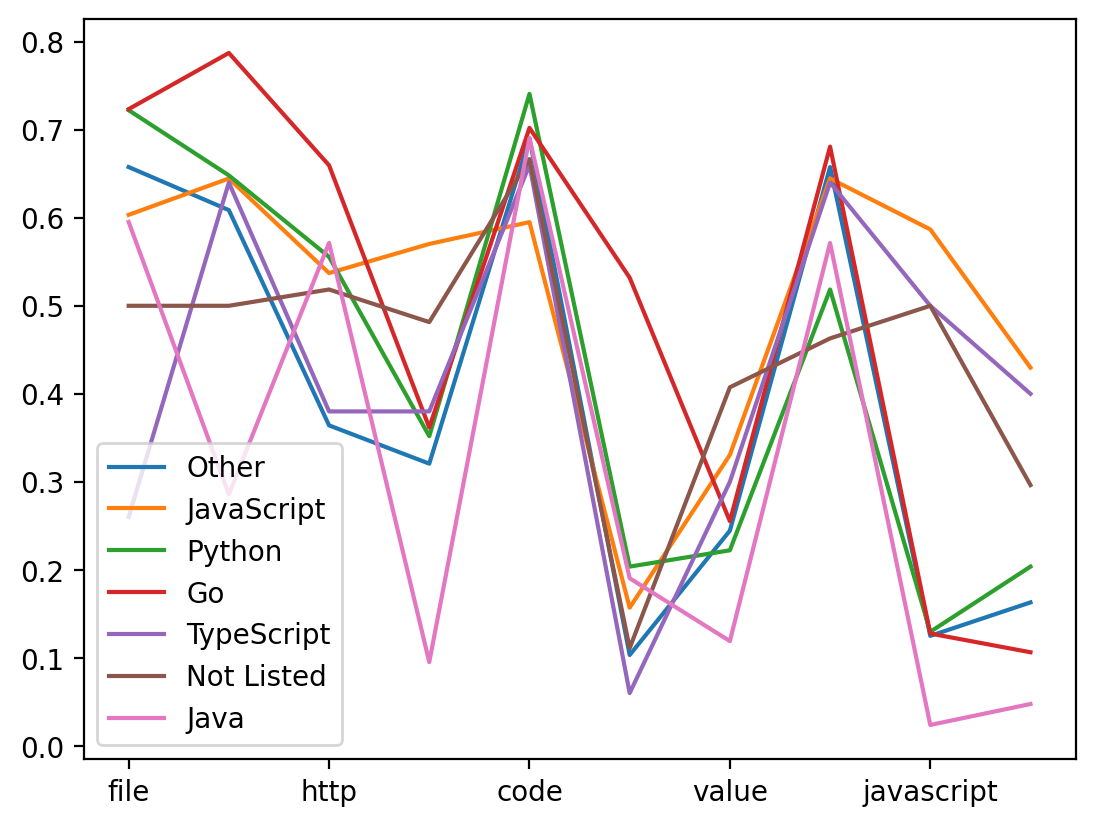

In [15]:
reload(e)
def two_plus(string:str):
    return ' '.join([s for s in string.split() if len(s) > 3])
train_cp = train.copy()
train_cp.lemmatized = train_cp.lemmatized.apply(two_plus)
e.top_ngrams_by_group(train).plot()

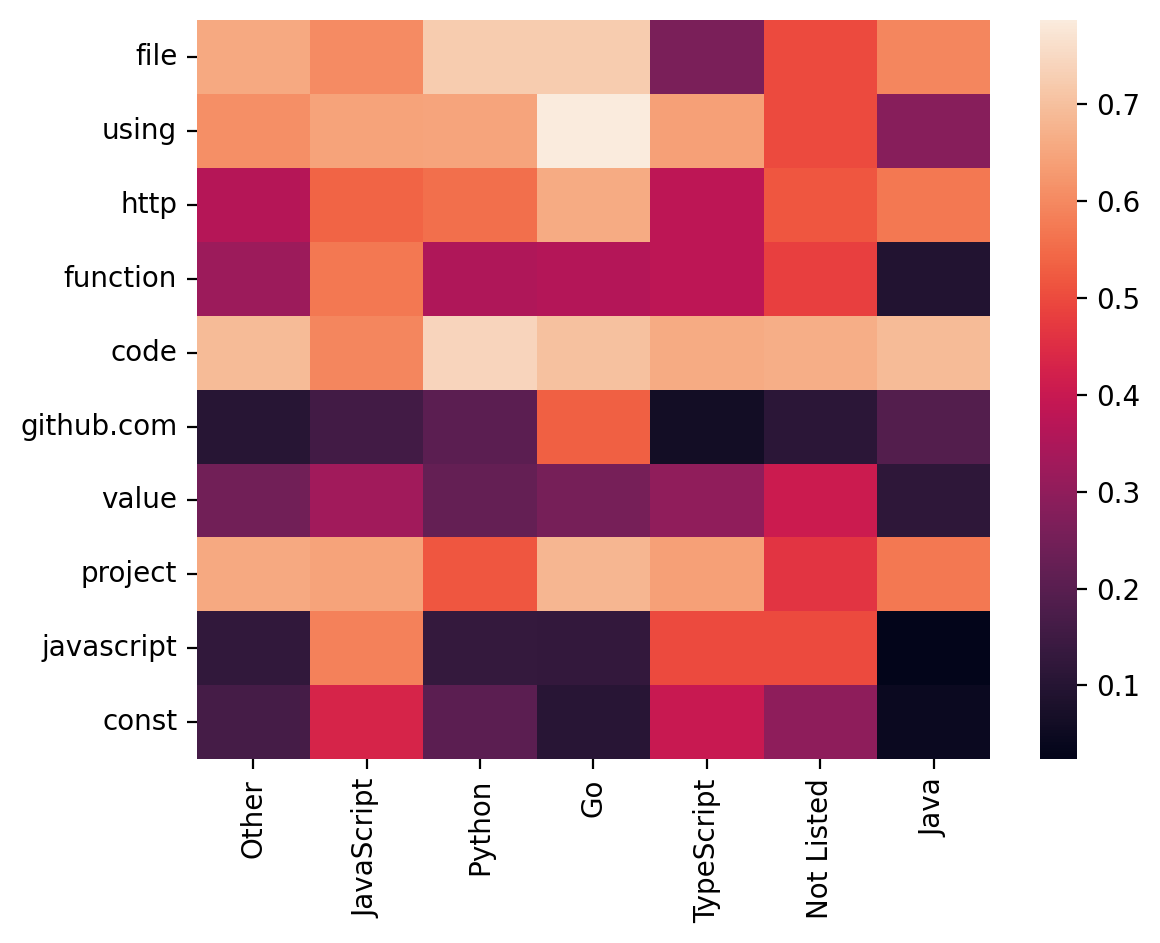

In [16]:
reload(e)
e.word_heat_map(train)